In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2d7bb63caf70534e46114b563f07465bd13051a315e683e719969b751be4f55a
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


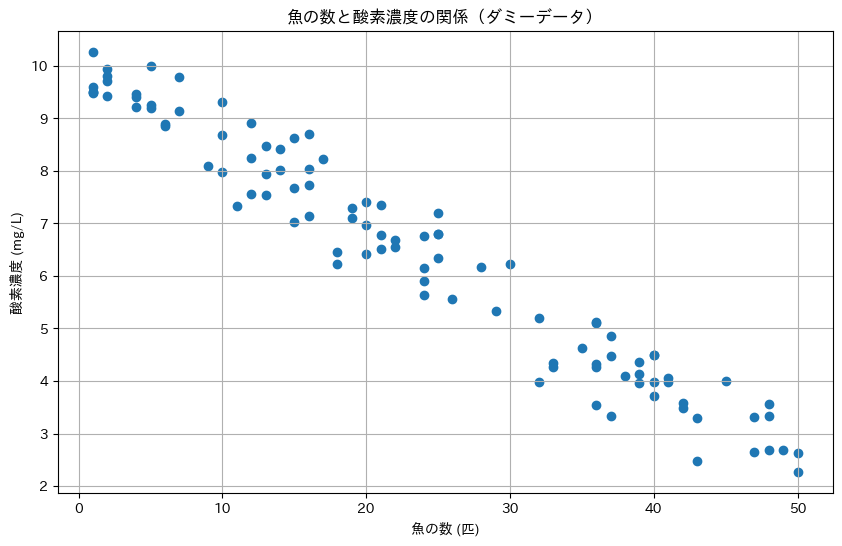

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # この行を追加

# 乱数のシードを固定して、いつでも同じデータが作られるようにする
np.random.seed(0)

# 魚の数 (1匹から50匹まで) をランダムに100個生成
# X は特徴量（原因）なので大文字で書くことが多い
X_fish_count = np.random.randint(1, 51, 100).reshape(-1, 1)

# 酸素濃度を計算 (基本の濃度10mg/Lから、魚1匹あたり0.15mg/L減少し、さらにランダムなノイズを加える)
# y は目的変数（結果）なので小文字で書くことが多い
y_oxygen_level = 10 - 0.15 * X_fish_count.flatten() + np.random.normal(0, 0.5, 100)

# 生成したデータの関係をグラフで見てみる
plt.figure(figsize=(10, 6))
plt.scatter(X_fish_count, y_oxygen_level)
plt.title('魚の数と酸素濃度の関係（ダミーデータ）')
plt.xlabel('魚の数 (匹)')
plt.ylabel('酸素濃度 (mg/L)')
plt.grid(True)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. データを訓練用とテスト用に分割する
#    モデルの学習に使うデータ（訓練用）と、モデルの性能評価に使うデータ（テスト用）に分ける
#    test_size=0.2 は、全体の20%をテスト用にすることを意味する
X_train, X_test, y_train, y_test = train_test_split(X_fish_count, y_oxygen_level, test_size=0.2, random_state=0)

# 2. 線形回帰モデルを準備する
model = LinearRegression()

# 3. 訓練用のデータを使ってモデルを学習させる (fit)
model.fit(X_train, y_train)

print("モデルの学習が完了しました。")
# 学習によって見つけ出された直線の傾き（係数）と切片
print(f"傾き (係数): {model.coef_[0]:.4f}")
print(f"切片: {model.intercept_:.4f}")

モデルの学習が完了しました。
傾き (係数): -0.1517
切片: 10.0307


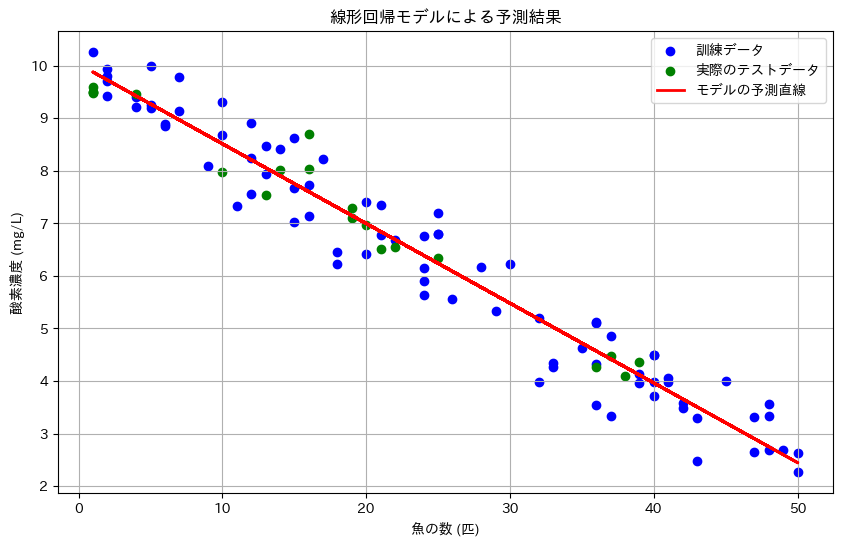


魚が25匹の時の予測される酸素濃度は 6.24 mg/L です。


In [4]:
# テスト用の魚の数を使って、酸素濃度を予測する (predict)
y_pred = model.predict(X_test)

# 結果をグラフで可視化して評価する
plt.figure(figsize=(10, 6))
# 訓練データ（青い点）
plt.scatter(X_train, y_train, color='blue', label='訓練データ')
# テストデータの実際の値（緑の点）
plt.scatter(X_test, y_test, color='green', label='実際のテストデータ')
# モデルが予測した直線（赤い線）
plt.plot(X_fish_count, model.predict(X_fish_count), color='red', linewidth=2, label='モデルの予測直線')

plt.title('線形回帰モデルによる予測結果')
plt.xlabel('魚の数 (匹)')
plt.ylabel('酸素濃度 (mg/L)')
plt.legend()
plt.grid(True)
plt.show()

# 新しいデータで予測してみる
new_fish_count = np.array([[25]]) # 例えば、魚が25匹の場合
predicted_oxygen = model.predict(new_fish_count)
print(f"\n魚が{new_fish_count[0][0]}匹の時の予測される酸素濃度は {predicted_oxygen[0]:.2f} mg/L です。")